Company sales data

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Load dataset
df = pd.read_csv("company_sales_data.csv")

#Set month_number as the index
df.set_index('month_number', inplace=True)
print(df.head())

              facecream  facewash  toothpaste  bathingsoap  shampoo  \
month_number                                                          
1                  2500      1500        5200         9200     1200   
2                  2630      1200        5100         6100     2100   
3                  2140      1340        4550         9550     3550   
4                  3400      1130        5870         8870     1870   
5                  3600      1740        4560         7760     1560   

              moisturizer  total_units  total_profit  
month_number                                          
1                    1500        21100        211000  
2                    1200        18330        183300  
3                    1340        22470        224700  
4                    1130        22270        222700  
5                    1740        20960        209600  


Exercise 1: Read Total profit of all months and show it using a line plot
Total profit data provided for each month. Generated line plot must include the following properties: –
● X label name = Month Number
● Y label name = Total profit

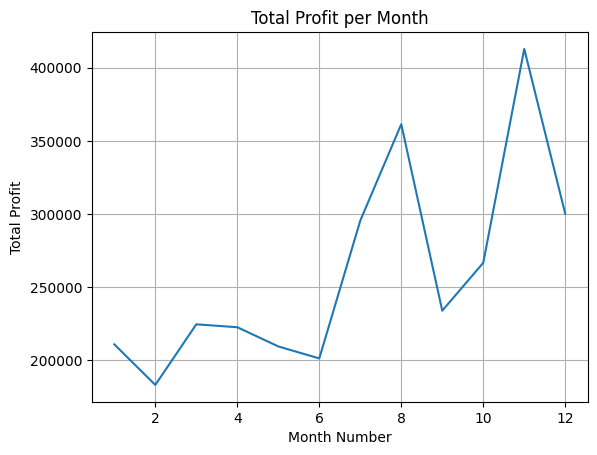

In [77]:
# Plot the total profit per month
plt.plot(df.index, df['total_profit'])

# Adding labels
plt.xlabel('Month Number')
plt.ylabel('Total Profit')
plt.title('Total Profit per Month')

# Display the plot
plt.grid(True)
plt.show()

Exercise 2: Get total profit of all months and show line plot with the following Style properties
Generated line plot must include following Style properties: –
● Line Style dotted and Line-color should be red
● Show legend at the lower right location.
● X label name = Month Number
● Y label name = Sold units number
● Add a circle marker.
● Line marker color as read
● Line width should be 3

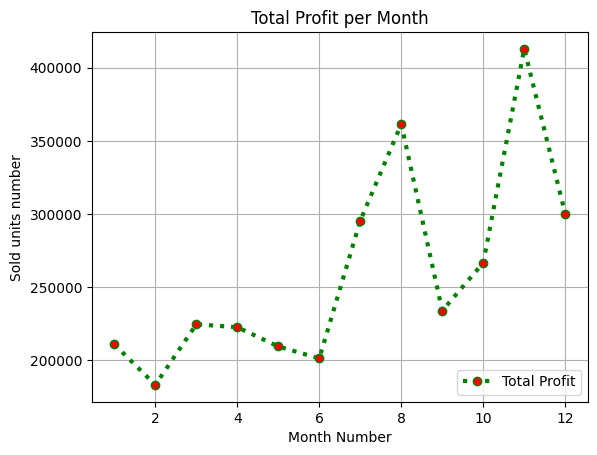

In [79]:
plt.plot(df.index, df['total_profit'], color="green", linestyle="dotted", marker='o', markerfacecolor='red', linewidth=3)

# Adding labels
plt.xlabel('Month Number')
plt.ylabel('Sold units number')
plt.title('Total Profit per Month')
plt.legend(['Total Profit'], loc='lower right')

# Display the plot
plt.grid(True)
plt.show()

Exercise 3: Read all product sales data and show it using a multiline plot
Display the number of units sold per month for each product using multiline plots. (i.e., Separate Plotline
for each product).

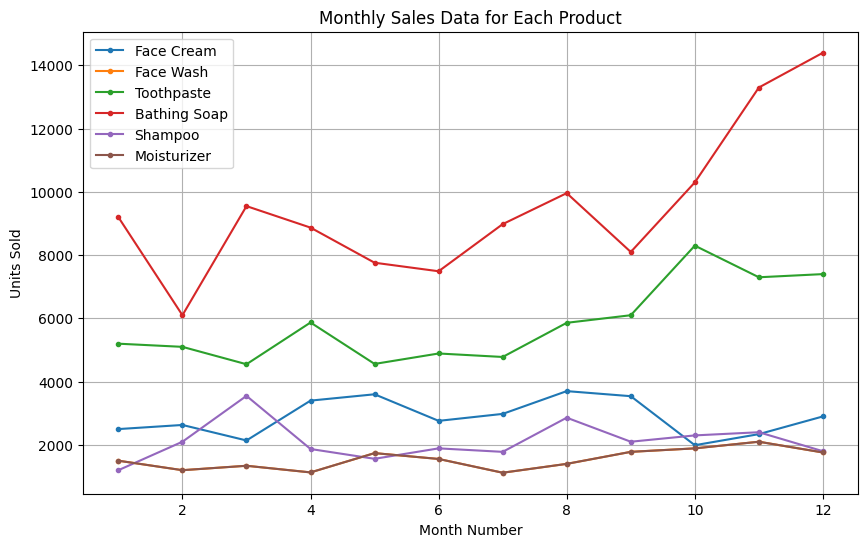

In [80]:
# Set figure size
plt.figure(figsize=(10, 6))
# Plot a line for each product
plt.plot(df.index, df['facecream'], label='Face Cream', marker='.')
plt.plot(df.index, df['facewash'], label='Face Wash', marker='.')
plt.plot(df.index, df['toothpaste'], label='Toothpaste', marker='.')
plt.plot(df.index, df['bathingsoap'], label='Bathing Soap', marker='.')
plt.plot(df.index, df['shampoo'], label='Shampoo', marker='.')
plt.plot(df.index, df['moisturizer'], label='Moisturizer', marker='.')

# Add labels and title
plt.xlabel('Month Number')
plt.ylabel('Units Sold')
plt.title('Monthly Sales Data for Each Product')

# Add legend
plt.legend(loc='upper left')

# Add grid
plt.grid(True)

# Show plot
plt.show()

Exercise 4: Read toothpaste sales data of each month and show it using a scatter plot. Also, add a grid in
the plot. gridline style should “–“.

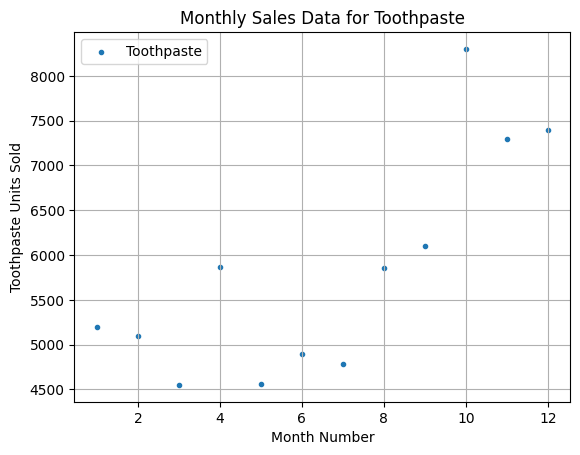

In [81]:
plt.scatter(df.index, df['toothpaste'], label='Toothpaste', marker='.')
plt.xlabel('Month Number')
plt.ylabel('Toothpaste Units Sold')
plt.title('Monthly Sales Data for Toothpaste')

# Add legend
plt.legend(loc='upper left')

# Add grid
plt.grid(True, linestyle='-')

# Show plot
plt.show()

Exercise 5: Read face cream and facewash product sales data and show it using the bar chart

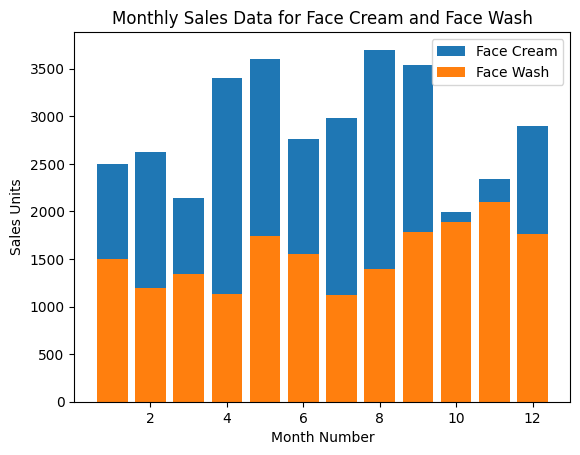

In [82]:
plt.bar(df.index, df['facecream'], label='Face Cream')
plt.bar(df.index, df['facewash'], label='Face Wash')
plt.xlabel('Month Number')
plt.ylabel('Sales Units')
plt.title('Monthly Sales Data for Face Cream and Face Wash')
plt.legend()
plt.show()


Exercise 6: Read sales data of bathing soap of all months and show it using a bar chart. Save this plot to your hard disk

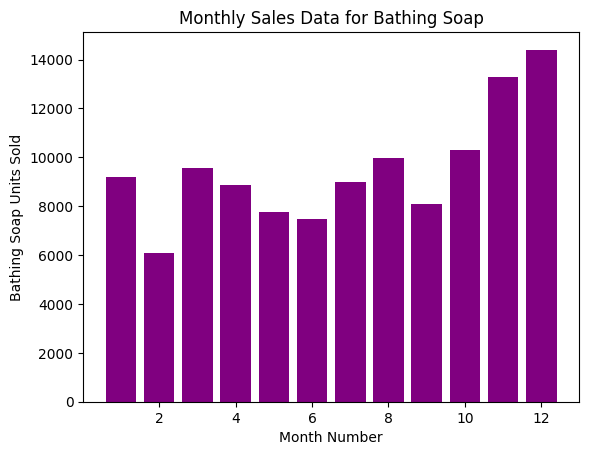

In [83]:
plt.bar(df.index, df['bathingsoap'], label='Bathing Soap', color="purple")
plt.xlabel('Month Number')
plt.ylabel('Bathing Soap Units Sold')
plt.title('Monthly Sales Data for Bathing Soap')

plt.savefig('bathing_soap_sales.png')
#plt.savefig('C:/Users/HP/Desktop/Npower/python - data visualization/Npowerbathing_soap_sales.png')
#plt.savefig('C:\\Users\\HP\\Desktop\\Npower\\python - data visualization\\Npowerbathing_soap_sales.png')
#plt.savefig(r'C:\Users\HP\Desktop\Npower\python - data visualization\Npowerbathing_soap_sales.png')


Exercise 7: Read the total profit of each month and show it using the histogram to see the most common
profit ranges

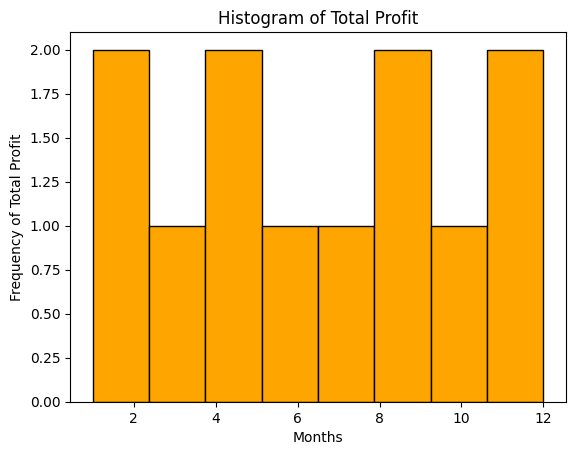

In [89]:
plt.hist(df.index, bins=8, color='orange', edgecolor='black')
# Adding labels
plt.xlabel('Months')
plt.ylabel('Frequency of Total Profit')
plt.title('Histogram of Total Profit')

plt.show()

Exercise 8: Calculate total sale data for last year for each product and show it using a Pie chart

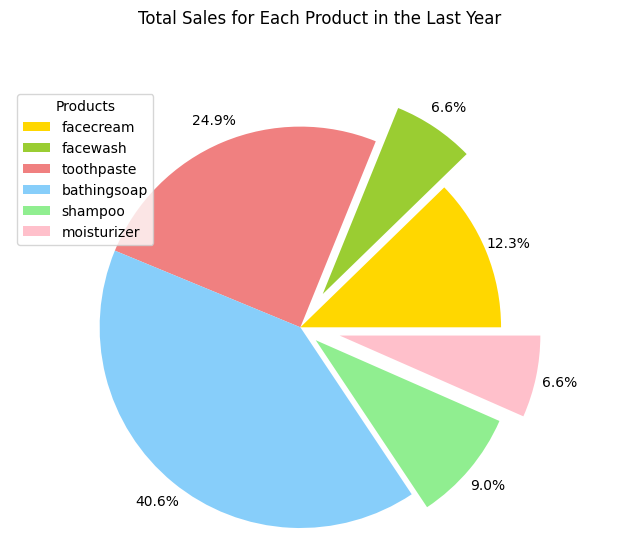

In [114]:

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

total_sales = df[['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']].sum()
explode_list=[0.0, 0.2, 0.0, 0.0, 0.1, 0.2]
plt.figure(figsize=(8, 6))
plt.pie(total_sales, autopct='%1.1f%%',
                    #startangle=90,
                    #shadow=True,
                    labels=None, # turn off labels on pie chart
                    pctdistance=1.12,
                    explode=explode_list,
                    colors=colors_list)

# scale the title up by 12% to match pctdistance
plt.title('Total Sales for Each Product in the Last Year', y=1.12)
plt.axis('equal')

plt.legend(total_sales.index, title="Products", loc="upper left")

plt.show()

Exercise 9: Read Bathing soap facewash of all months and display it using the Subplot

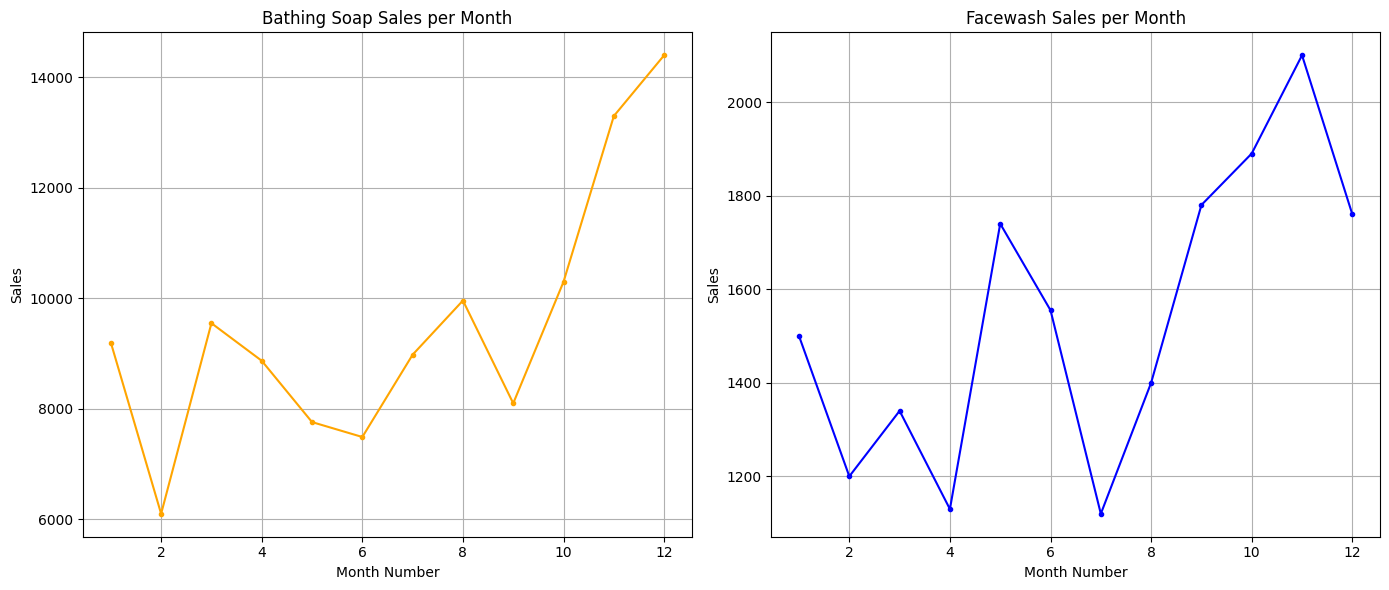

In [123]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot Bathing Soap sales
axes[0].plot(df.index, df['bathingsoap'], marker='.', color='orange')
axes[0].set_title('Bathing Soap Sales per Month')
axes[0].set_xlabel('Month Number')
axes[0].set_ylabel('Sales')
axes[0].grid(True)

# Plot Facewash sales
axes[1].plot(df.index, df['facewash'], marker='.', color='blue')
axes[1].set_title('Facewash Sales per Month')
axes[1].set_xlabel('Month Number')
axes[1].set_ylabel('Sales')
axes[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

Exercise 10: Read all product sales data and show it using the stack plot

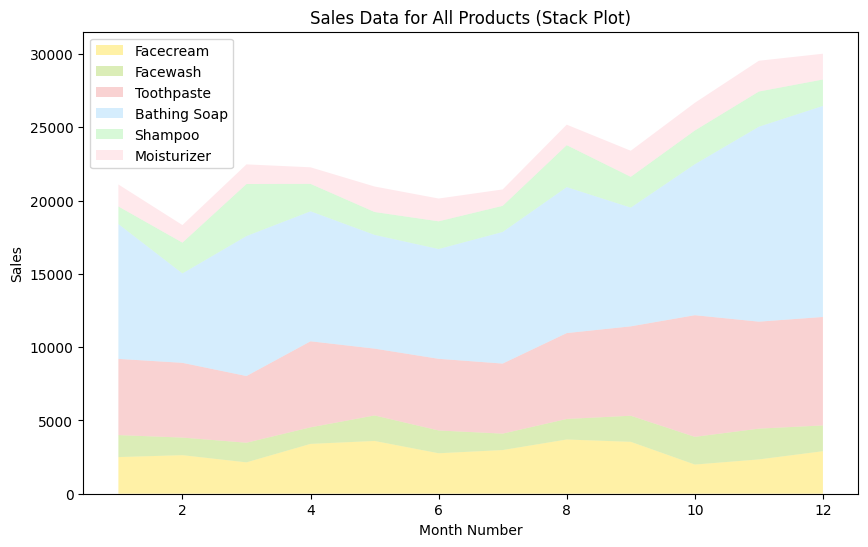

In [147]:
plt.figure(figsize=(10, 6))

# Plot the stack plot
plt.stackplot(df.index,
              df['facecream'], df['facewash'], df['toothpaste'], df['bathingsoap'], df['shampoo'], df['moisturizer'],
              labels=['Facecream', 'Facewash', 'Toothpaste', 'Bathing Soap', 'Shampoo', 'Moisturizer'],
              colors = colors_list,
              alpha=0.35)

# Adding labels and title
plt.xlabel('Month Number')
plt.ylabel('Sales')
plt.title('Sales Data for All Products (Stack Plot)')

# Show the legend
plt.legend(loc='upper left')

# Show the plot
plt.show()